https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [3]:
headlines= ['DOJ watchdog reportedly sends criminal referral for McCabe to federal prosecutor',
           'House Dems add five candidates to ‘Red to Blue’ program',
           'DeveloperTown co-founder launches independent bid for U.S. Senate',
           'Trump confidantes Bossie, Lewandowski urge against firing Mueller',
           'Trump Administration Seeks to Expand Sales of Armed Drones',
           'Trump skews reasons behind his 2016 win',
           'Japanese PM Praises Trump for North Korea Breakthrough',
           'Beyer Statement On Syria Strikes',
           'Mattis disputes report he wanted Congress to approve Syria strike']

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:2], width=100)

[{'compound': -0.5267,
  'headline': 'DOJ watchdog reportedly sends criminal referral for McCabe to federal prosecutor',
  'neg': 0.254,
  'neu': 0.746,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'House Dems add five candidates to ‘Red to Blue’ program',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [5]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.254,0.746,0.000,-0.5267,DOJ watchdog reportedly sends criminal referra...
1,0.000,1.000,0.000,0.0000,House Dems add five candidates to ‘Red to Blue...
2,0.000,1.000,0.000,0.0000,DeveloperTown co-founder launches independent ...
3,0.255,0.745,0.000,-0.3400,"Trump confidantes Bossie, Lewandowski urge aga..."
4,0.000,0.777,0.223,0.3182,Trump Administration Seeks to Expand Sales of ...


In [6]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.254,0.746,0.000,-0.5267,DOJ watchdog reportedly sends criminal referra...,-1
1,0.000,1.000,0.000,0.0000,House Dems add five candidates to ‘Red to Blue...,0
2,0.000,1.000,0.000,0.0000,DeveloperTown co-founder launches independent ...,0
3,0.255,0.745,0.000,-0.3400,"Trump confidantes Bossie, Lewandowski urge aga...",-1
4,0.000,0.777,0.223,0.3182,Trump Administration Seeks to Expand Sales of ...,1


In [7]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Trump Administration Seeks to Expand Sales of Armed Drones', 'Trump skews reasons behind his 2016 win', 'Japanese PM Praises Trump for North Korea Breakthrough']

Negative headlines:

['DOJ watchdog reportedly sends criminal referral for McCabe to federal prosecutor',
 'Trump confidantes Bossie, Lewandowski urge against firing Mueller',
 'Beyer Statement On Syria Strikes',
 'Mattis disputes report he wanted Congress to approve Syria strike']


In [8]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

-1    4
 1    3
 0    2
Name: label, dtype: int64
-1    44.444444
 1    33.333333
 0    22.222222
Name: label, dtype: float64


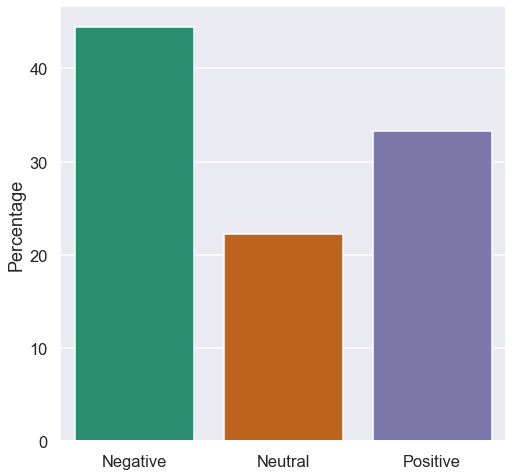

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [10]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one.'try it!'"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one', '.', "'try", 'it', '!', "'"]


In [11]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one',
 'try',
 'it']

In [12]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [13]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [14]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 3),
 ('administration', 1),
 ('seeks', 1),
 ('expand', 1),
 ('sales', 1),
 ('armed', 1),
 ('drones', 1),
 ('skews', 1),
 ('reasons', 1),
 ('behind', 1),
 ('2016', 1),
 ('win', 1),
 ('japanese', 1),
 ('pm', 1),
 ('praises', 1),
 ('north', 1),
 ('korea', 1),
 ('breakthrough', 1)]

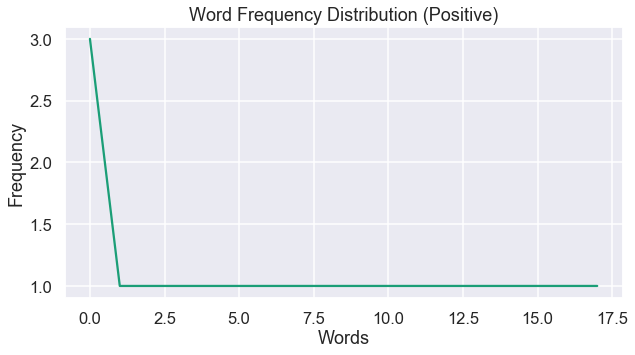

In [15]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [16]:
y_val[0::4]

[3, 1, 1, 1, 1]

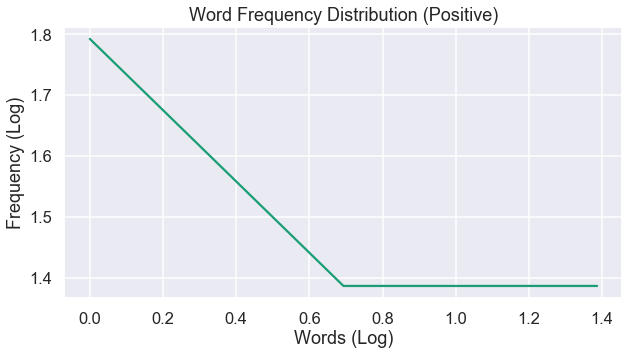

In [17]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [18]:
df2 = df[['headline', 'label']]
df2

,headline,label
0,DOJ watchdog reportedly sends criminal referra...,-1
1,House Dems add five candidates to ‘Red to Blue...,0
2,DeveloperTown co-founder launches independent ...,0
3,"Trump confidantes Bossie, Lewandowski urge aga...",-1
4,Trump Administration Seeks to Expand Sales of ...,1
5,Trump skews reasons behind his 2016 win,1
6,Japanese PM Praises Trump for North Korea Brea...,1
7,Beyer Statement On Syria Strikes,-1
8,Mattis disputes report he wanted Congress to a...,-1


In [19]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('syria', 2),
 ('doj', 1),
 ('watchdog', 1),
 ('reportedly', 1),
 ('sends', 1),
 ('criminal', 1),
 ('referral', 1),
 ('mccabe', 1),
 ('federal', 1),
 ('prosecutor', 1),
 ('trump', 1),
 ('confidantes', 1),
 ('bossie', 1),
 ('lewandowski', 1),
 ('urge', 1),
 ('firing', 1),
 ('mueller', 1),
 ('beyer', 1),
 ('statement', 1),
 ('strikes', 1)]

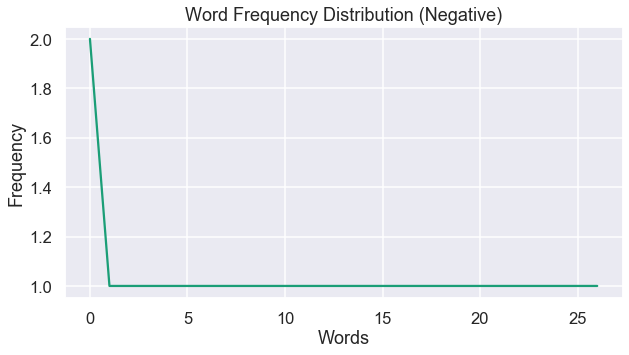

In [20]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

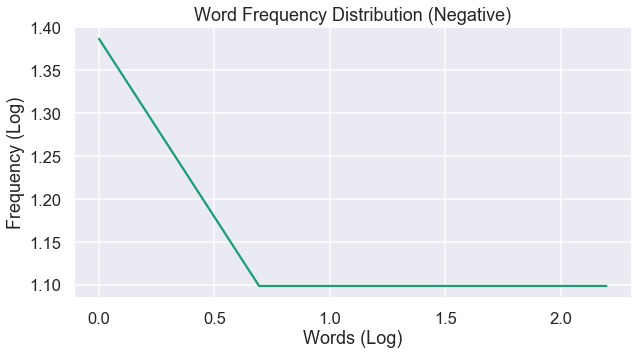

In [21]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

https://www.learndatasci.com/tutorials/predicting-reddit-news-sentiment-naive-bayes-text-classifiers/

In [22]:
df2

,headline,label
0,DOJ watchdog reportedly sends criminal referra...,-1
1,House Dems add five candidates to ‘Red to Blue...,0
2,DeveloperTown co-founder launches independent ...,0
3,"Trump confidantes Bossie, Lewandowski urge aga...",-1
4,Trump Administration Seeks to Expand Sales of ...,1
5,Trump skews reasons behind his 2016 win,1
6,Japanese PM Praises Trump for North Korea Brea...,1
7,Beyer Statement On Syria Strikes,-1
8,Mattis disputes report he wanted Congress to a...,-1


In [23]:
df = df2[df2.label != 0]
df.label.value_counts()

-1    4
 1    3
Name: label, dtype: int64

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

s1 = "Senate panel moving ahead with Mueller bill despite McConnell opposition"
s2 = "Bill protecting Robert Mueller to get vote despite McConnell opposition"
s3 = "bill bill bill"

vect = CountVectorizer(binary=True)
vect


CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [25]:
X = vect.fit_transform([s1, s2, s3])

X.toarray()

array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [26]:
list(zip(X.toarray()[0], vect.get_feature_names()))

[(1, 'ahead'),
 (1, 'bill'),
 (1, 'despite'),
 (0, 'get'),
 (1, 'mcconnell'),
 (1, 'moving'),
 (1, 'mueller'),
 (1, 'opposition'),
 (1, 'panel'),
 (0, 'protecting'),
 (0, 'robert'),
 (1, 'senate'),
 (0, 'to'),
 (0, 'vote'),
 (1, 'with')]

In [27]:
list(zip(X.toarray()[1], vect.get_feature_names()))

[(0, 'ahead'),
 (1, 'bill'),
 (1, 'despite'),
 (1, 'get'),
 (1, 'mcconnell'),
 (0, 'moving'),
 (1, 'mueller'),
 (1, 'opposition'),
 (0, 'panel'),
 (1, 'protecting'),
 (1, 'robert'),
 (0, 'senate'),
 (1, 'to'),
 (1, 'vote'),
 (0, 'with')]

In [28]:
list(zip(X.toarray()[2], vect.get_feature_names()))

[(0, 'ahead'),
 (1, 'bill'),
 (0, 'despite'),
 (0, 'get'),
 (0, 'mcconnell'),
 (0, 'moving'),
 (0, 'mueller'),
 (0, 'opposition'),
 (0, 'panel'),
 (0, 'protecting'),
 (0, 'robert'),
 (0, 'senate'),
 (0, 'to'),
 (0, 'vote'),
 (0, 'with')]

In [29]:
vect = CountVectorizer(max_features=1000, binary=True)
X = vect.fit_transform(df.headline)

X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [30]:
from sklearn.model_selection import train_test_split

X = df.headline
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
X

0    DOJ watchdog reportedly sends criminal referra...
3    Trump confidantes Bossie, Lewandowski urge aga...
4    Trump Administration Seeks to Expand Sales of ...
5              Trump skews reasons behind his 2016 win
6    Japanese PM Praises Trump for North Korea Brea...
7                     Beyer Statement On Syria Strikes
8    Mattis disputes report he wanted Congress to a...
Name: headline, dtype: object

In [32]:
X_train

6    Japanese PM Praises Trump for North Korea Brea...
3    Trump confidantes Bossie, Lewandowski urge aga...
0    DOJ watchdog reportedly sends criminal referra...
8    Mattis disputes report he wanted Congress to a...
4    Trump Administration Seeks to Expand Sales of ...
Name: headline, dtype: object

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [34]:
counts = df.label.value_counts()
print(counts)

print("\nPredicting only -1 = {:.2f}% accuracy".format(counts[-1] / sum(counts) * 100))

-1    4
 1    3
Name: label, dtype: int64

Predicting only -1 = 57.14% accuracy


In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind='regular',k_neighbors=1)

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(-1, 3), (1, 3)]


In [41]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
nb.predict(X_train_vect)

array([ 1, -1, -1, -1,  1], dtype=int64)

In [43]:
nb.score(X_train_res, y_train_res)

1.0

In [44]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([ 1, -1], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 100.00%

F1 Score: 100.00

COnfusion Matrix:
 [[1 0]
 [0 1]]


In [50]:
train_index

array([1, 0, 3, 5, 6])

In [51]:
test_index

array([4, 2])

In [56]:
from sklearn.model_selection import ShuffleSplit

X = df.headline
y = df.label

ss = ShuffleSplit(n_splits=10, test_size=0.1)
sm = SMOTE(kind='regular',k_neighbors=1)

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))


Average accuracy across folds: 50.00%

Average F1 score across folds: 30.00%

Average Confusion Matrix across folds: 
 [[0.5 1. ]
 [0.5 0.5]]


C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set 

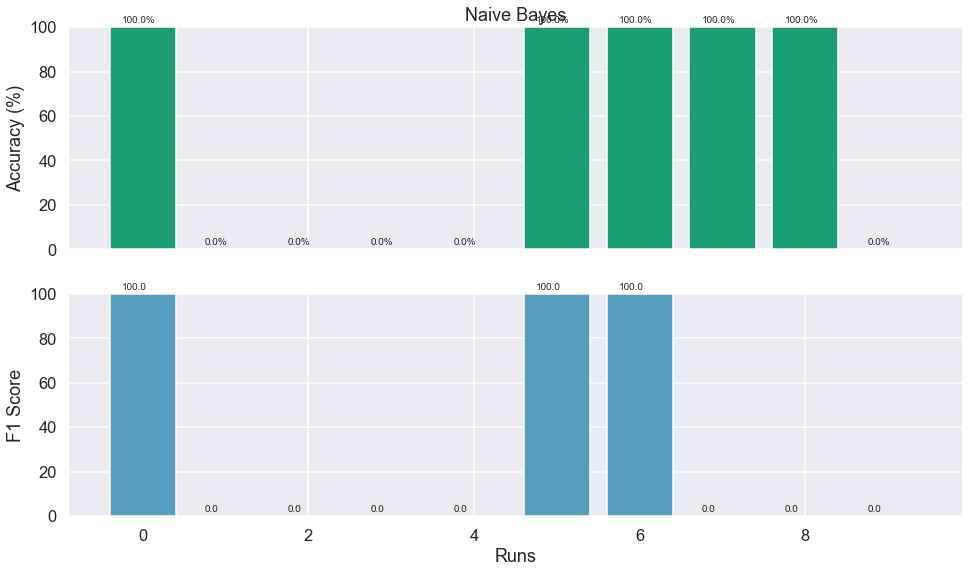

In [57]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()

In [60]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

X = df.headline
y = df.label

cv = ShuffleSplit(n_splits=20, test_size=0.2)

models = [
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    MLPClassifier()
]

sm = SMOTE(kind='regular',k_neighbors=1)

# Init a dictionary for storing results of each run for each model
results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}

for train_index, test_index in cv.split(X):
    X_train, X_test  = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_vect = vect.fit_transform(X_train)    
    X_test_vect = vect.transform(X_test)
    
    X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
# We now have a bunch of accuracy scores, f1 scores, and confusion matrices stored for each model. Let's average these together to get average scores across models and folds:

for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        """
    print(s)

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change fro

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarni

MultinomialNB
------------------------------
        Avg. Accuracy: 70.00%
        Avg. F1 Score: 53.33
        Avg. Confusion Matrix: 
        
[[0.8 0.7]
 [0.1 0.7]]
        
BernoulliNB
------------------------------
        Avg. Accuracy: 65.00%
        Avg. F1 Score: 41.67
        Avg. Confusion Matrix: 
        
[[0.7 1.2]
 [0.5 1.1]]
        
LogisticRegression
------------------------------
        Avg. Accuracy: 75.00%
        Avg. F1 Score: 53.33
        Avg. Confusion Matrix: 
        
[[0.9 0.8]
 [0.3 0.9]]
        
SGDClassifier
------------------------------
        Avg. Accuracy: 60.00%
        Avg. F1 Score: 35.00
        Avg. Confusion Matrix: 
        
[[0.8 0.7]
 [0.3 0.5]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 77.50%
        Avg. F1 Score: 50.00
        Avg. Confusion Matrix: 
        
[[0.95 0.95]
 [0.5  1.1 ]]
        
RandomForestClassifier
------------------------------
        Avg. Accuracy: 75.00%
        Avg. F1 Score: 43.33

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [116]:
from collections import Counter
wordDict = Counter()

for i in range(len(df2['headline'])): #한 row씩
    for word in df2['headline'][i].split(): #한 문장에 들어있는 한 단어씩
        wordDict[word] += 1 #Counter에 count를 1씩 증가시킨다. 

In [117]:
wordDict

Counter({'DOJ': 1,
         'watchdog': 1,
         'reportedly': 1,
         'sends': 1,
         'criminal': 1,
         'referral': 1,
         'for': 3,
         'McCabe': 1,
         'to': 5,
         'federal': 1,
         'prosecutor': 1,
         'House': 1,
         'Dems': 1,
         'add': 1,
         'five': 1,
         'candidates': 1,
         '‘Red': 1,
         'Blue’': 1,
         'program': 1,
         'DeveloperTown': 1,
         'co-founder': 1,
         'launches': 1,
         'independent': 1,
         'bid': 1,
         'U.S.': 1,
         'Senate': 1,
         'Trump': 4,
         'confidantes': 1,
         'Bossie,': 1,
         'Lewandowski': 1,
         'urge': 1,
         'against': 1,
         'firing': 1,
         'Mueller': 1,
         'Administration': 1,
         'Seeks': 1,
         'Expand': 1,
         'Sales': 1,
         'of': 1,
         'Armed': 1,
         'Drones': 1,
         'skews': 1,
         'reasons': 1,
         'behind': 1,
         '

In [143]:
wordDict.most_common(10)

[('to', 5),
 ('Trump', 4),
 ('for', 3),
 ('Syria', 2),
 ('DOJ', 1),
 ('watchdog', 1),
 ('reportedly', 1),
 ('sends', 1),
 ('criminal', 1),
 ('referral', 1)]

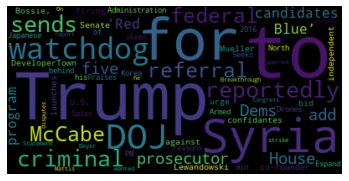

In [144]:
from wordcloud import WordCloud
wordcloud = WordCloud()

wc = WordCloud().generate_from_frequencies(wordDict)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [122]:
from nltk import Text

text=[]
for i in range(len(df2['headline'])): #한 row씩
    txt = Text(tokenizer.tokenize(df2['headline'][i]))
    text.append(txt)


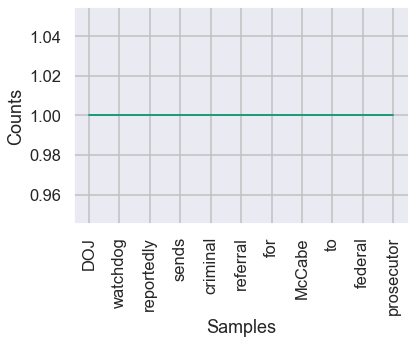

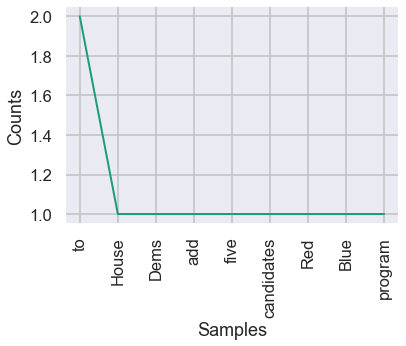

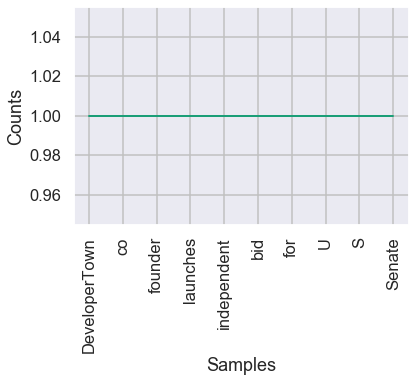

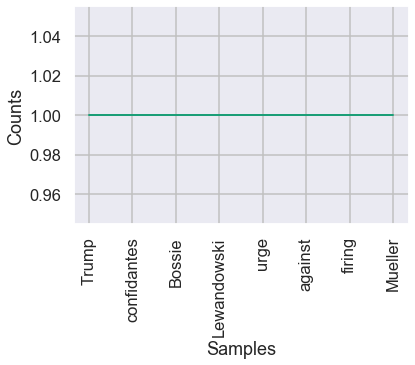

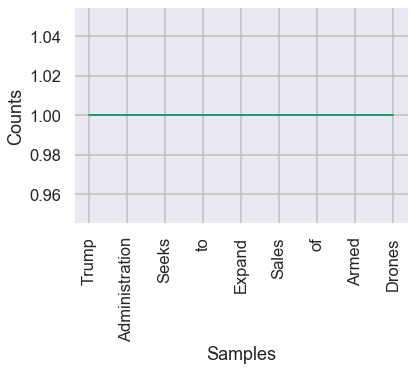

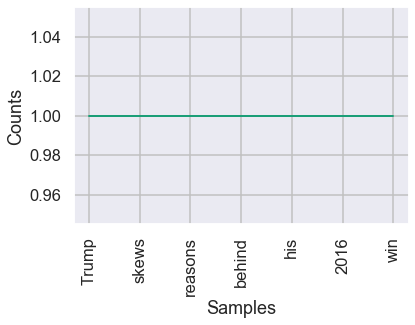

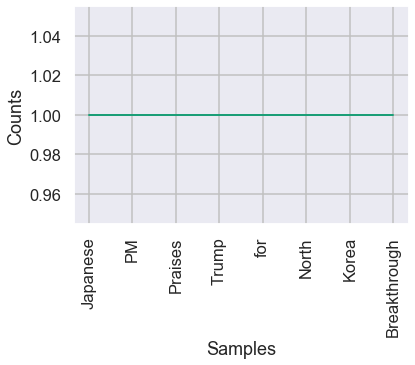

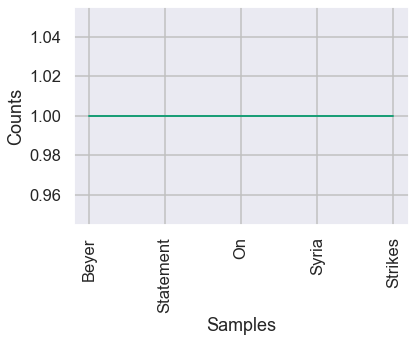

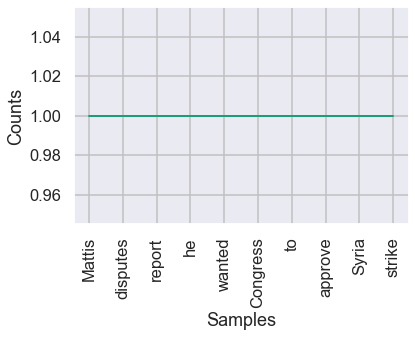

In [133]:
for i in range(len(text)):
    text[i].plot(20)
plt.show()

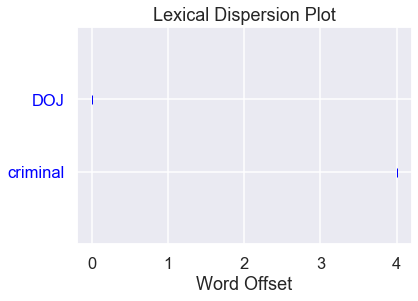

In [136]:
text[0].dispersion_plot(["DOJ", "criminal"])

In [137]:
text[0].concordance("criminal")

Displaying 1 of 1 matches:
DOJ watchdog reportedly sends criminal referral for McCabe to federal pro


In [138]:
text[0].similar("criminal")

In [139]:
text[0].common_contexts(["DOJ", "criminal"])

No common contexts were found


In [149]:
text[0]

<Text: DOJ watchdog reportedly sends criminal referral for McCabe...>